## Classification of Movie Reviews - IMDB dataset

First, we load movie data from Keras package.

In [1]:
from keras.datasets import imdb

# Select only the top 10,000 most frequent words
(train_data, train_lables), (test_data, test_lables) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


Encoding the integer sequences into a binary matrix for the first layer of neural network

In [2]:
import numpy as np

def vectorize_sequence(sequence, dimension=10000):
    
    results = np.zeros((len(sequence), dimension))
    
    for i , sequence in enumerate(sequence):
        
        results[i, sequence] = 1
        
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

# Shape of dataset
x_train.shape

# A sample of dataset looks like this
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Also, labels should be vectorized.

In [3]:
y_train = np.asarray(train_lables).astype('float32')
y_test = np.asarray(test_lables).astype('float32')

Parameters of Neural Network. To improve accuracy of the model, its parameter should be tuned.

In [4]:
num_hidden_units = 64
hidden_layer_act_func = 'relu'
output_layer_act_func = 'sigmoid'
optimizer = 'rmsprop'
loss_func = 'binary_crossentropy'
epochs = 10
batch_size = 512

A three-layer network

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(num_hidden_units, activation=hidden_layer_act_func, input_shape=(10000,)))
model.add(layers.Dense(num_hidden_units, activation=hidden_layer_act_func))
model.add(layers.Dense(num_hidden_units, activation=hidden_layer_act_func))
model.add(layers.Dense(1, activation=output_layer_act_func))

After the model was created, you need to determine opitimizer and loss function.

In [6]:
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])

A validation set is created to monitor the accuracy of the model on data it has never seen before.

In [7]:
x_val = x_train[:10000]
y_val = y_train[:10000]
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

Now, it's time to train the model.

In [8]:
history = model.fit(partial_x_train, partial_y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 131us/step - loss: 0.4942 - acc: 0.7588 - val_loss: 0.3268 - val_acc: 0.8725
Epoch 2/10
15000/15000 [==============================] - 1s 77us/step - loss: 0.2640 - acc: 0.8999 - val_loss: 0.4209 - val_acc: 0.8280
Epoch 3/10
15000/15000 [==============================] - 1s 76us/step - loss: 0.1860 - acc: 0.9311 - val_loss: 0.2830 - val_acc: 0.8884
Epoch 4/10
15000/15000 [==============================] - 1s 77us/step - loss: 0.1458 - acc: 0.9485 - val_loss: 0.3136 - val_acc: 0.8841
Epoch 5/10
15000/15000 [==============================] - 1s 78us/step - loss: 0.1060 - acc: 0.9637 - val_loss: 0.3458 - val_acc: 0.8846
Epoch 6/10
15000/15000 [==============================] - 1s 77us/step - loss: 0.0902 - acc: 0.9716 - val_loss: 0.3859 - val_acc: 0.8800
Epoch 7/10
15000/15000 [==============================] - 1s 77us/step - loss: 0.0742 - acc: 0.9797 - val_loss: 0.4169 - val_ac

Let's plot training and validation loss using Matplotlib package

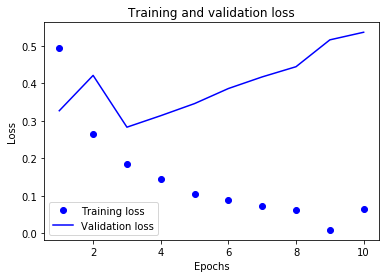

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss'] # Training loss
val_loss_values = history_dict['val_loss'] # Validation loss

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting the training and validation accurcy

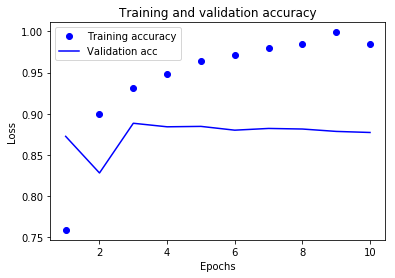

In [10]:
plt.clf # Clear previous fig
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Evaluate model

In [11]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 2s 62us/step


[0.5879524342906475, 0.86464]

Predictions on new data (test data)

In [12]:
model.predict(x_test)

array([[0.00940163],
       [1.        ],
       [0.9999157 ],
       ...,
       [0.00771755],
       [0.0054414 ],
       [0.7848147 ]], dtype=float32)